## **Linear regression with Python Scikit Learn**
In this task we want to predict the percentage of an student based on the no. of study hours.

## **Simple regression**

Gather data that includes two variables:

1. The percentage obtained by each student (dependent variable, denoted as Y).
2. The number of study hours for each student (independent variable, denoted as X).

Fit a simple linear regression model to the training data. The model will have the form:

Percentage (Y) = Slope (a) * Study Hours (X) + Intercept (b)

The goal is to find the values of 'a' and 'b' that best fit your training data.

In [171]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics
import seaborn as sns


### Take data from source

In [172]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plot the real data 

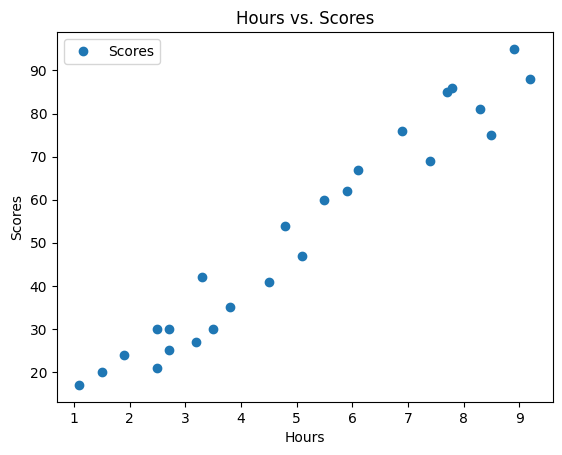

In [173]:
data.plot(x='Hours', y='Scores',style= 'o')
plt.title('Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


In [174]:
x = data['Hours'].values
x = x.reshape(-1, 1)
y = data['Scores'].values

### Split data to Train and Test sets

In [175]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=.2)

### Define and train the linear predict model

In [176]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Examin the defined model 

In [177]:
y_hat = model.predict(x_test)
error = y_test - y_hat
mse = metrics.mean_absolute_error(y_true=y_test,y_pred=y_hat)
print(f'MSE of error: {mse: .2f}')

MSE of error:  6.18


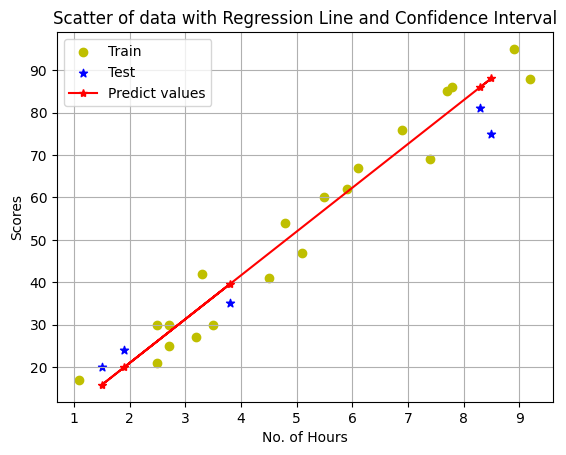

In [178]:
line = model.coef_*x+model.intercept_
plt.scatter(x_train,y_train, color='y', label = 'Train')
plt.scatter(x_test,y_test, marker= '*',color='b', label = 'Test')
# plt.plot(x,line)
# plt.show()
plt.plot(x_test, y_hat, color= 'r', marker='*', label= 'Predict values')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.title('Scatter of data with Regression Line and Confidence Interval')
plt.legend()
plt.grid()
plt.show()

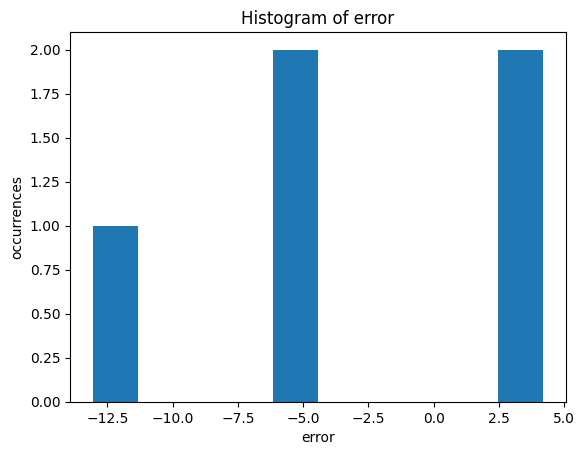

In [179]:
plt.hist(error)
plt.title('Histogram of error')
plt.xlabel('error')
plt.ylabel('occurrences')
plt.show()

In [180]:
df = pd.DataFrame({'real':y_test,'predict':y_hat})
df

,real,predict
0,24,19.922840
1,35,39.539460
2,20,15.793025
3,75,88.064785
4,81,85.999878


In [181]:
st_hours = [9.25]
st_score = model.predict([st_hours])
print(f'Student with No of Hours : {st_hours[0]}\nThe predicted score is: {st_score[0]: .2f}')

Student with No of Hours : 9.25
The predicted score is:  95.81
